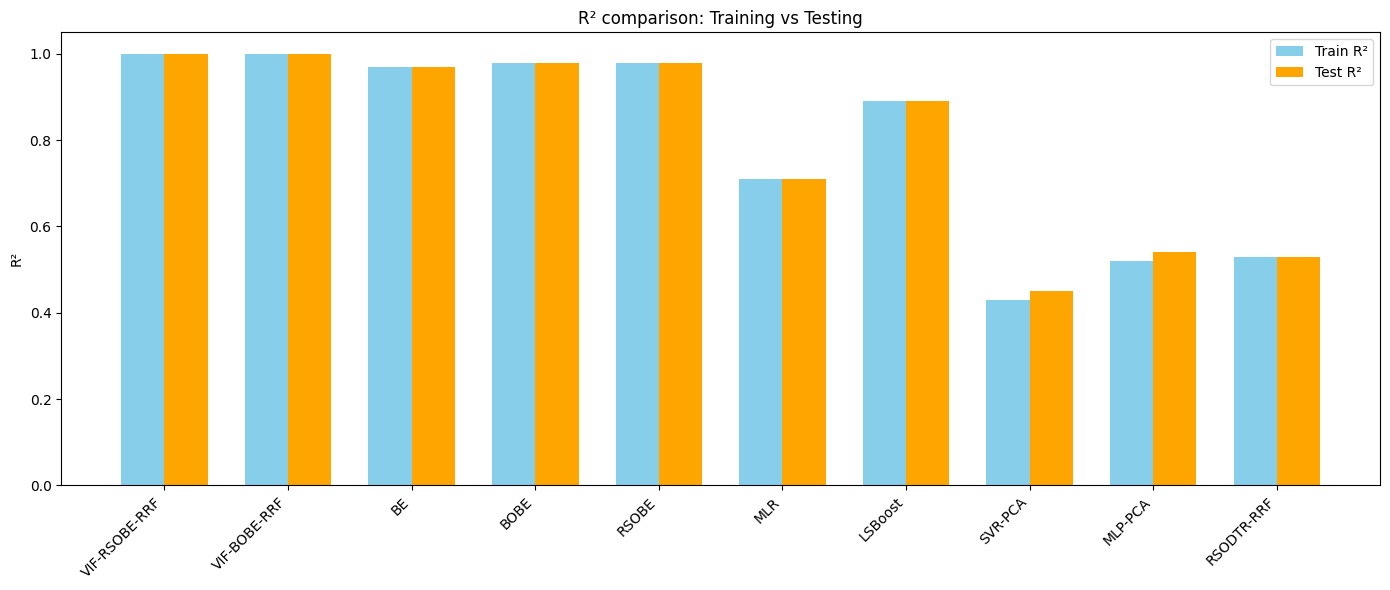

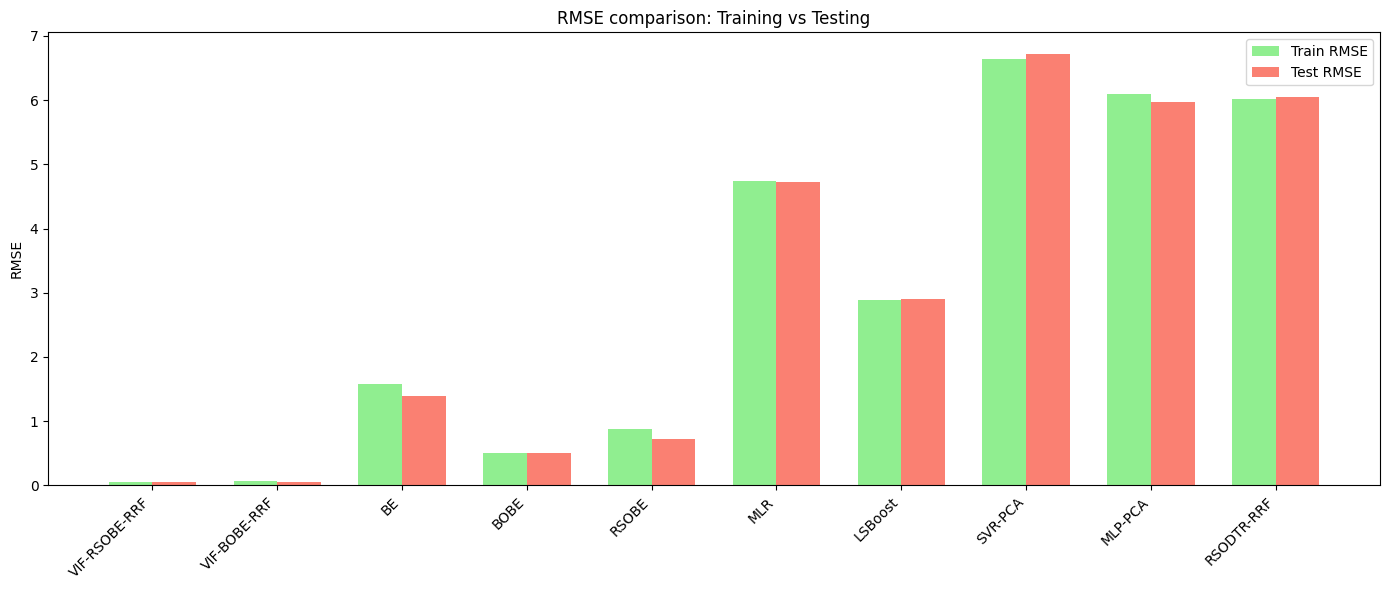

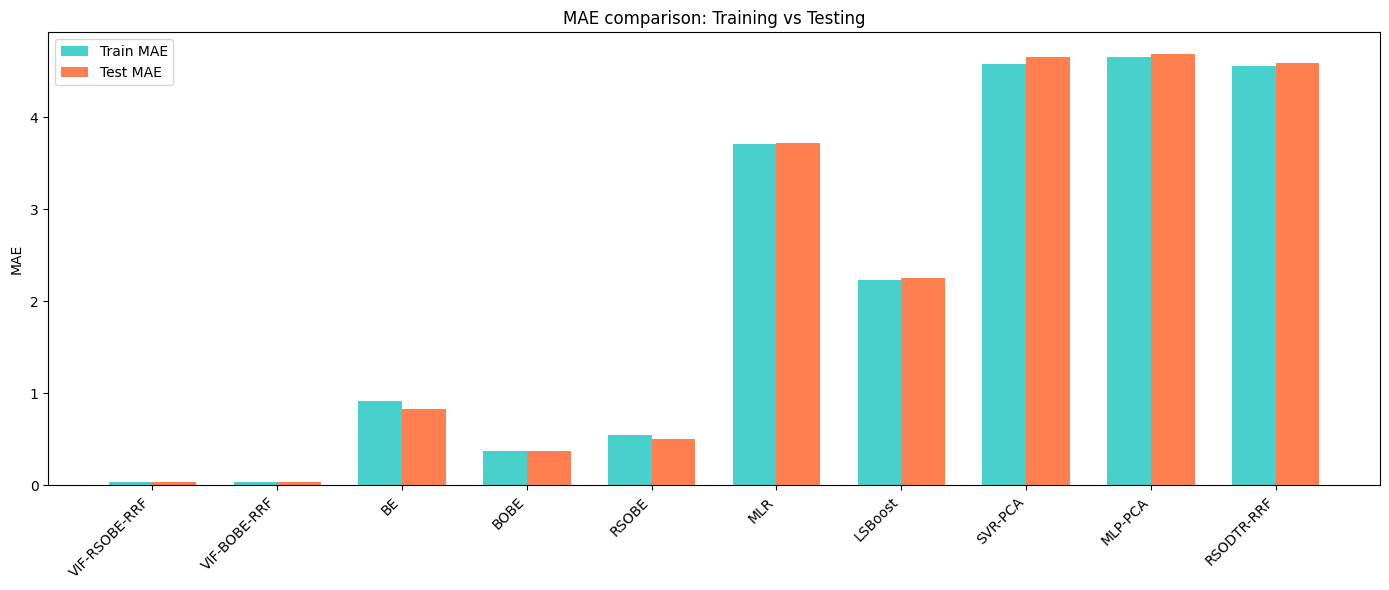

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    'VIF-RSOBE-RRF', 'VIF-BOBE-RRF', 'BE', 'BOBE', 'RSOBE',
    'MLR', 'LSBoost', 'SVR-PCA', 'MLP-PCA', 'RSODTR-RRF'
]

# Training metrics
r2_train = [1, 1, 0.97, 0.98, 0.98, 0.71, 0.89, 0.43, 0.52, 0.53]
rmse_train = [0.05760, 0.060018, 1.5822, 0.49802, 0.88095, 4.7338, 2.8797, 6.6416, 6.1008, 6.0203]
mae_train = [0.03479, 0.037083, 0.9145, 0.37803, 0.54232, 3.7086, 2.229, 4.5807, 4.655, 4.5628]

# Testing metrics
r2_test = [1, 1, 0.97, 0.98, 0.98, 0.71, 0.89, 0.45, 0.54, 0.53]
rmse_test = [0.053345, 0.05976, 1.3947, 0.49806, 0.7294, 4.7281, 2.8951, 6.7202, 5.9756, 6.0512]
mae_test = [0.033343, 0.037102, 0.82514, 0.37495, 0.50606, 3.7231, 2.2528, 4.6627, 4.691, 4.5922]

x = np.arange(len(models))
width = 0.35

# Plot R²
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, r2_train, width, label='Train R²', color='skyblue')
plt.bar(x + width/2, r2_test, width, label='Test R²', color='orange')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('R²')
plt.title('R² comparison: Training vs Testing')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rmse_train, width, label='Train RMSE', color='lightgreen')
plt.bar(x + width/2, rmse_test, width, label='Test RMSE', color='salmon')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('RMSE comparison: Training vs Testing')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, mae_train, width, label='Train MAE', color='mediumturquoise')
plt.bar(x + width/2, mae_test, width, label='Test MAE', color='coral')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('MAE')
plt.title('MAE comparison: Training vs Testing')
plt.legend()
plt.tight_layout()
plt.show()



🔍 SHAP for Model 2 (VIF-RSOBE-RRF)

📊 Global Feature Importance for Kaggle motor UPDRS prediction — VIF-RSOBE-RRF model (Bar Plots)
Model 2:


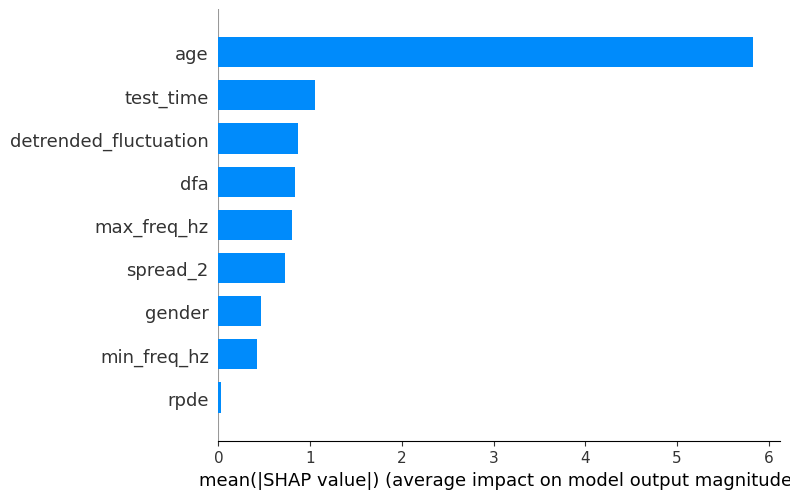


📊 Feature Effect Per Instance for Kaggle motor UPDRS prediction — VIF-RSOBE-RRF model (Beeswarm)
Model 2:


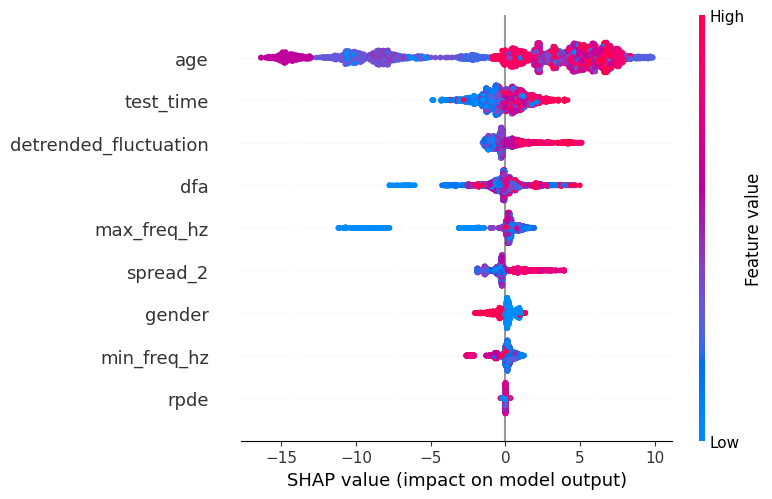

In [2]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- Load New Dataset ---
data = pd.read_excel("new data motor.xlsx")

# --- Define Features and Target ---
selected_features = ['max_freq_hz', 'min_freq_hz', 'rpde', 'dfa',
                     'spread_2', 'detrended_fluctuation', 'age', 'gender', 'test_time']
X = data[selected_features]
y = data.iloc[:, -1]  # assuming last column is the target (e.g., total_UPDRS)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Define Bagged Models ---


# Model 2: VIF-RSOBE-RRF (e.g., 121 trees)
model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingRegressor(
        estimator=DecisionTreeRegressor(min_samples_leaf=2),
        n_estimators=121,
        max_features=len(selected_features),
        random_state=42,
        n_jobs=-1
    ))
])

# --- Fit Models ---
model2.fit(X_train, y_train)

# --- Scale Test Data ---
scaler2 = model2.named_steps['scaler']
X_test_scaled2 = scaler2.transform(X_test)



# --- SHAP for Model 2 ---
print("\n🔍 SHAP for Model 2 (VIF-RSOBE-RRF)")
shap_values_list2 = [
    shap.TreeExplainer(tree).shap_values(X_test_scaled2)
    for tree in model2.named_steps['bagging'].estimators_
]
shap_values2_avg = np.mean(shap_values_list2, axis=0)

# --- Convert Scaled Test Data to DataFrame for SHAP Plot ---
X_test_df = pd.DataFrame(X_test_scaled2, columns=selected_features)  # Use scaled1 since features are the same

# --- SHAP Summary Plots (Bar) ---
print("\n📊 Global Feature Importance for Kaggle motor UPDRS prediction — VIF-RSOBE-RRF model (Bar Plots)")
print("Model 2:")
shap.summary_plot(shap_values2_avg, X_test_df, feature_names=selected_features, plot_type="bar")

# --- SHAP Summary Plots (Beeswarm) ---
print("\n📊 Feature Effect Per Instance for Kaggle motor UPDRS prediction — VIF-RSOBE-RRF model (Beeswarm)")
print("Model 2:")
shap.summary_plot(shap_values2_avg, X_test_df, feature_names=selected_features)
